In [28]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import h5py
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [29]:
np.random.seed(0)

In [30]:
train_path='images_animal/train'
valid_path='images_animal/valid'
test_path='images_animal/test'
class_list=['Clone','Nutria']

In [54]:
train_batches=ImageDataGenerator(rescale=1./255).flow_from_directory(train_path,target_size=(224,224),class_mode='binary',batch_size=10)
test_batches=ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,target_size=(224,224),class_mode='binary',batch_size=1)
valid_batches=ImageDataGenerator(rescale=1./255).flow_from_directory(valid_path,target_size=(224,224),class_mode='binary',batch_size=10)

Found 112 images belonging to 2 classes.
Found 12 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


In [32]:
def plots(ims,figsize=(10,6),rows=1,interp=False,titles=None):
    if type(ims[0]) is np.ndarray:
        ins=np.array(ims).astype(np.uint8)
        if (ims.shape[-1] !=3):
            ims=ims.transpose((0,2,3,1))
    f=plt.figure(figsize=figsize)
    cols=len(ims)//rows if len(ims)%2 ==0 else len(ims)//rows
    for i in range(len(ims)):
        sp=f.add_subplot(rows,cols,i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=10)
        plt.imshow(ims[i],interpolation=None)

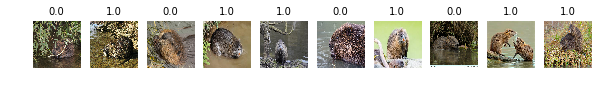

In [33]:
imgs,labels=next(train_batches)
plots(imgs,titles=labels)

In [34]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=3, input_shape=(224,224,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.1))

model.add(Conv2D(filters=1024,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.1))

#model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(.1))
model.add(Dense(1,activation='softmax'))
model.summary()

opt=Adam(lr=.0001)
model.compile(opt,loss='binary_crossentropy',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 109, 109, 512)     295424    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 54, 54, 512)       0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 54, 54, 512)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 52, 52, 128)       589952    
__________

In [35]:
history=model.fit_generator(train_batches,steps_per_epoch=4, nb_epoch=10
                            ,validation_data=valid_batches,validation_steps=4, verbose=2)

/home/spidey/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/home/spidey/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=4, validation_data=<keras_pre..., epochs=10, validation_steps=4, verbose=2)`
  


Epoch 1/10
 - 19s - loss: 4.7827 - acc: 0.7000 - val_loss: 3.9856 - val_acc: 0.7500
Epoch 2/10
 - 17s - loss: 5.5798 - acc: 0.6500 - val_loss: 3.9856 - val_acc: 0.7500
Epoch 3/10
 - 14s - loss: 2.9294 - acc: 0.8163 - val_loss: 3.5428 - val_acc: 0.7778
Epoch 4/10
 - 17s - loss: 3.5870 - acc: 0.7750 - val_loss: 3.5870 - val_acc: 0.7750
Epoch 5/10
 - 17s - loss: 4.7827 - acc: 0.7000 - val_loss: 4.8713 - val_acc: 0.6944
Epoch 6/10
 - 14s - loss: 5.8788 - acc: 0.6312 - val_loss: 3.1885 - val_acc: 0.8000
Epoch 7/10
 - 17s - loss: 5.5798 - acc: 0.6500 - val_loss: 3.9856 - val_acc: 0.7500
Epoch 8/10
 - 17s - loss: 4.7827 - acc: 0.7000 - val_loss: 4.4284 - val_acc: 0.7222
Epoch 9/10
 - 14s - loss: 3.3479 - acc: 0.7900 - val_loss: 3.9856 - val_acc: 0.7500
Epoch 10/10
 - 17s - loss: 5.9784 - acc: 0.6250 - val_loss: 4.4284 - val_acc: 0.7222


Text(0.5, 0, 'epoch')

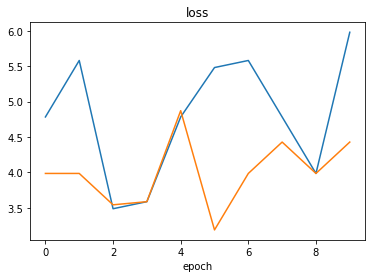

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

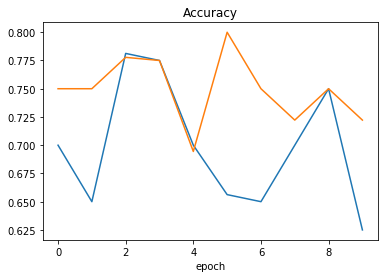

In [37]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

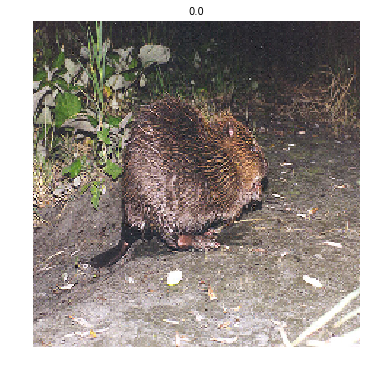

In [81]:
test_imgs,test_labels=next(test_batches)
plots(test_imgs,titles=test_labels)

In [82]:
pred=model.predict_generator(test_batches,steps=1)

In [83]:
pred

array([[1.]], dtype=float32)